# Lab Sheet 4 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-4.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
#import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

## Frequency analysis (of periodic signals)

The **[Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier "Click here to read additional information on Joseph Fourier on Wikipedia") Theorem** states that any periodic signal of frequency $f_0$ can be constructed exactly by adding together ‘sinusoids’ (sine waves) with frequencies $f_0$, $2f_0$, $3f_0$, $4f_0$, $5f_0$, etc. The segmentation of a periodic time domain signal into sinusoids is called [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis "Read additional information on Fourier Analysis on Wikipedia").

Each sinusoid in this ‘[Fourier Series](https://en.wikipedia.org/wiki/Fourier_series "Read additional information about the Fourier Series on Wikipedia")’ is characterised by its …
* frequency
* amplitude and
* phase

$f_0$ is termed the *fundamental frequency*

$2 f_0$, $3 f_0$, $4 f_0$, etc. are termed the *harmonics*

### The sawtooth signal
The [sawtooth](https://en.wikipedia.org/wiki/Sawtooth_wave "Read additional information on the saw tooth signal on Wikipedia") signal in its most general form is defined as

\begin{equation}
x(t) = t - \lfloor t \rfloor \tag{1}
\end{equation}

or centered around 0 as

\begin{equation}
x(t) = 2 (t - \lfloor t \rfloor) - 1 \tag{2}
\end{equation}

The `scipy` library gives us more flexibility to generate and visualise a sawtooth signals since they can be generated as if they were sine signals. 

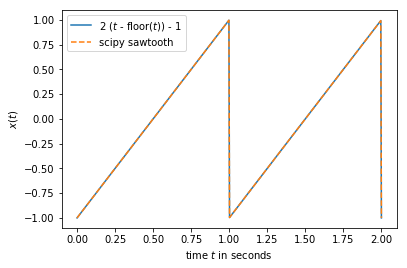

In [3]:
from scipy import signal

t = np.linspace(0, 2, 500)
saw_tooth = 2*(t-np.floor(t))-1

f0 = 1 # frequency in Hz for scipy samtooth
saw_tooth2 = signal.sawtooth(2 * np.pi * f0 * t)

plt.plot(t, saw_tooth, label='$2$ ($t$ - floor($t$)) - $1$')
plt.plot(t, saw_tooth2, '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

We see in the plot above that as well implementing the sawtooth using equation (2) as using the `scipy` library leads to the same curve (though the `scipy` method provised more fleibility.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1:**
    
Generate a sawtooth signal of length $2$ seconds and a fundamental frequency $f_0 = 200$ Hz using the `scipy` library and play it back.
    
To achieve this, replace the comments indicated by `# ...` in the code below.
    
The code will show the initial 20 ms of the time domain signal as well as the spectrum (frequency domain) using the function `np.fft.rfft()`, which calculates the (complex) discrete Fourier Transform (DFT) of a real-values time series.
</div>

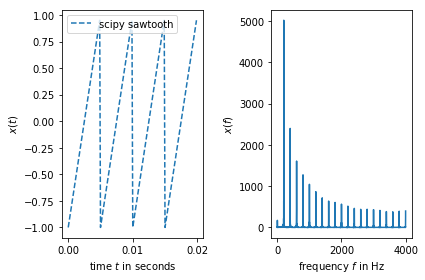

In [8]:
from scipy import signal            # for easy sawtooth signal generation
from IPython import display as ipd  # to playback audio signals

fs= 8000                  # sampling frequency
t = np.linspace(0,2,2*fs)      # time vector

f0 = 200                  # frequency in Hz for scipy sawtooth
saw_tooth = signal.sawtooth(2*np.pi*f0*t)

# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(1,2,1)
plt.plot(t[0:160], saw_tooth[0:160], '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# calculate the spectum (frequency domain representation)
FFT_length = 2**15 # take a power of two which is larger than the signal length
f = np.linspace(0, fs/2, num=int(FFT_length/2+1))
spectrum = np.abs(np.fft.rfft(saw_tooth,n=FFT_length))

# plot the spectrum
plt.subplot(1,2,2)
plt.plot(f,spectrum)
plt.xlabel('frequency $f$ in Hz');plt.ylabel('$x(f)$')

plt.tight_layout() # this allowes for some space for the title text.

# playback sound file (if you want)
ipd.Audio(saw_tooth, rate=fs)

### Constructing a sawtooth signal from its sinusoids

In the following we want to construct the sawtooth signal from it's Fourier Series. The time-reversed sawtooth signal can be described in a simple form by the following Fourier series:

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothSimple}
f(t) &=& \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right]\tag{3}\\
     &=& \frac{2}{\pi} \sum_{k=1}^{\infty}\,\frac{\sin(k\omega_0t)}{k}\tag{4}
\end{eqnarray*}

with $\omega = 2 \pi f$ being the angular frequency.

Please note that we will first implement the Fourier Series of the time-reversed sawtooth signal ($x(-t)$) since the equation \eqref{eq:FourierSeriesSawtoothSimple} is simpler. In a next step we will have a look at the Fourier Series in the time direction as defined above.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2:**
    
Generate the first four sinusoids from \eqref{eq:FourierSeriesSawtoothSimple} and show that a superposition of these results in a sawtooth signal. For a simple visualisation you could choose $f_s = 8000$ Hz, $f_0=2$ Hz and a length of $2$ seconds for the time vector $\mathbf{t}$. But feel free to play around with these values.
    
Hint: It might be a good idea to realise the sawtooth generation as a function, e.g. with the following interface:<br>
`generateSawTooth(f0=1, length = 2, fs=8000, order=10)`

</div>

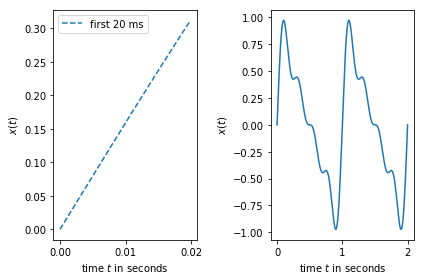

In [90]:
# your code here


# def generateSawTooth(f0,length,fs,order):
#     t=np.linspace(0,length,length*fs)
#     saw = signal.sawtooth(2*np.pi*f0*t)
#     return saw[0:(order*fs)]

# def FourierSeries(n):
#     ft=np.zeros(len(t))
#     for i in range(1,(n+1)):
#         ft+=2/np.pi*(np.sin(i*w0*t)/i)
#     return ft

def generateSawTooth(f0,length,fs,order):
    t=np.linspace(0,length,length*fs)
    ft=np.zeros(len(t))
    for i in range(1,(order+1)):
        ft+=2/np.pi*(np.sin(i*2*np.pi*f0*t)/i)
    return ft

ft=generateSawTooth(f0=1, length = 2, fs=8000, order=4)




ft=FourierSeries(4)
# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(1,2,1)
plt.plot(t[0:160], ft[0:160], '--', label='first 20 ms');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# plot the spectrum
plt.subplot(1,2,2)
plt.plot(t,ft[0:2*fs])
plt.xlabel('time $t$ in seconds');plt.ylabel('$x(t)$')

plt.tight_layout() # this allowes for some space for the title text.

From the lecture we should remember that the sine (and cosine) oscillations can be visualised as projections of a vector from the center of a carthesian coordinate system to the unit circle moving on the unit circle to the $x$ and $y$ axes as visualised below.

<img src="signals-sine-cosine-circle2.gif" alt="Relation between unit circle and the sine/cosine generation." style="width: 500px;"/>

If we add  a second sine (here with double frequency ($2\omega_0$) but half the amplitude) on top of the first one, i.e. want to implement $\sin(\omega_0 t) + 0.5 \sin(2\omega_0t)$, this can be interpreted as adding another vector starting from the current value on the unit circle (green point in the left panel of the visualisation below) to a second circle with half the radius (amplitude factor 0.5).

<img src="signals-sine-circle-fourier-superposition2.gif" alt="Relation between unit circle and two sine signals as first two components of saw-tooth Fourier series." style="width: 500px;"/>

The center panel of the figure above shows the corresponding time domain signal which is already becoming 'somewhat sawtooth-like'. The right panel shows the spectral content, i.e. two spectral lines at the frequencies of the respective sine signals.

<img src="signals-sine-circle-fourier-superposition4.gif" alt="Relation between unit circle and four sine signals as first four components of saw-tooth Fourier series." style="width: 500px;"/>

If we want the saw-tooth signal to start with the part increasing from $0$ to $1$ first this can be achived by

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothRAisingBeginning}
f(t) &=& -\frac{2h}{\pi}\left[\sin(\omega_0t)-\frac{\sin(2\omega_0t)}{2}+\frac{\sin(3\omega_0t)}{3}\mp \cdots\right]\tag{5}\\
\label{eq:FourierSeriesSawtoothRAisingBeginning2}
 &=& -\frac{2h}{\pi} \sum_{k=1}^{\infty}\,(-1)^{k-1}\frac{\sin(k\omega_0t)}{k}\tag{6}
\end{eqnarray*}

In \eqref{eq:FourierSeriesSawtoothRAisingBeginning} and \eqref{eq:FourierSeriesSawtoothRAisingBeginning2}, $h$ is the height and $\omega = 2 \pi f$ the angular frequency.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 3:**
    
Realise a function `generateSawTooth2(f0=1, length = 2, fs=8000, order=10)` implementing equation \eqref{eq:FourierSeriesSawtoothRAisingBeginning}.

</div>

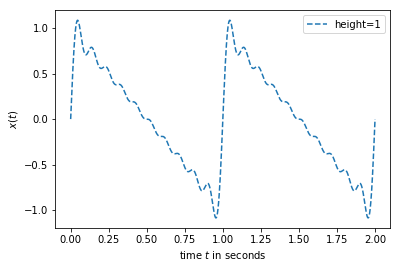

In [135]:
# your code here

def generateSawTooth2(f0,length,fs,order):
    t=np.linspace(0,length,length*fs)
    ft=np.zeros(len(t))
    for i in range(1,(order+1)):
        ft+=(-1)**(i-1)*(-2)/np.pi*(np.sin(i*2*np.pi*f0*t)/i)
    return ft

#ft=generateSawTooth(f0=1, length = 2, fs=8000, order=10)

ft3=generateSawTooth2(f0=1, length = 2, fs=8000, order=10)
plt.plot(t, ft3, '--', label='height=1');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();


### Trinangular wave form

Another periodic signal is the triangular wave form:

\begin{eqnarray}
\label{eq:FourierSeriesTriangular}
f(t) &=& \frac{8h}{\pi^2}\left[\sin(\omega_0t)-\frac{1}{3^2}\sin(3\omega_0t)+\frac{1}{5^2}\sin(5\omega_0t)\mp \cdots\right] \tag{7}\\
 &=& \frac{8h}{\pi^2} \sum_{k=1}^{\infty}\,(-1)^{k-1}\frac{\sin((2k-1)\omega_0t)}{(2k-1)^2} \tag{8}
\end{eqnarray}

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 4:**
    
Realise a function `generateTriangular(f0=1, length = 2, fs=8000, order=10)` implementing equation \eqref{eq:FourierSeriesTriangular}.

</div>

Text(0, 0.5, '$x(t)$')

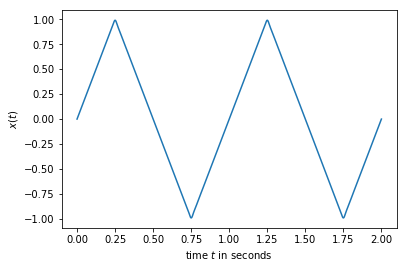

In [143]:
# your code here
#
def generateTriangular(f0,length,fs,order):
    t=np.linspace(0,length,length*fs)
    ft=np.zeros(len(t))
    for i in range(1,(order+1)):
        ft+=8/np.pi**2*(-1)**(i-1)*(np.sin((2*i-1)*2*np.pi*f0*t)/(2*i-1)**2)
    return ft,t


ft3,t=generateTriangular(f0=1, length = 2, fs=8000, order=20)
plt.plot(t, ft3);
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')




## (Discrete) Fourier Transform - An example

The Fourier Transform can be realised by `numpy`'s `np.fft.fft()` command.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 4:**
  
Create the superposition of the two sinusoidial signals

\begin{eqnarray}
    x(t)             &=& \mathrm{sin}_1(t) + \mathrm{sin}_2(t)
\end{eqnarray}
with 
\begin{eqnarray}
    \mathrm{sin}_1(t)&=&\mathrm{sin}(2 \pi f_1 t)\\
    \mathrm{sin}_2(t)&=&\mathrm{sin}(2 \pi f_2 t+\phi_1)
    f_1&=& 1230 \mathrm{Hz} \\
    f_2&=&1800 \mathrm{Hz} \\
    \phi_1&=& \pi
\end{eqnarray}

Plot time domain signal (e.g. for the first 20 ms) as well as the spectrum. Which one provides more insight into the signal properties, assuming that you don't know the mathematical description.
    
Hint: The spectrum of a real-valued time domain signal is always complex, i.e. you can either plot real and imaginary part or absolute value (and phase).
</div>

No handles with labels found to put in legend.


Signal length is 16000
DFT length is 16384


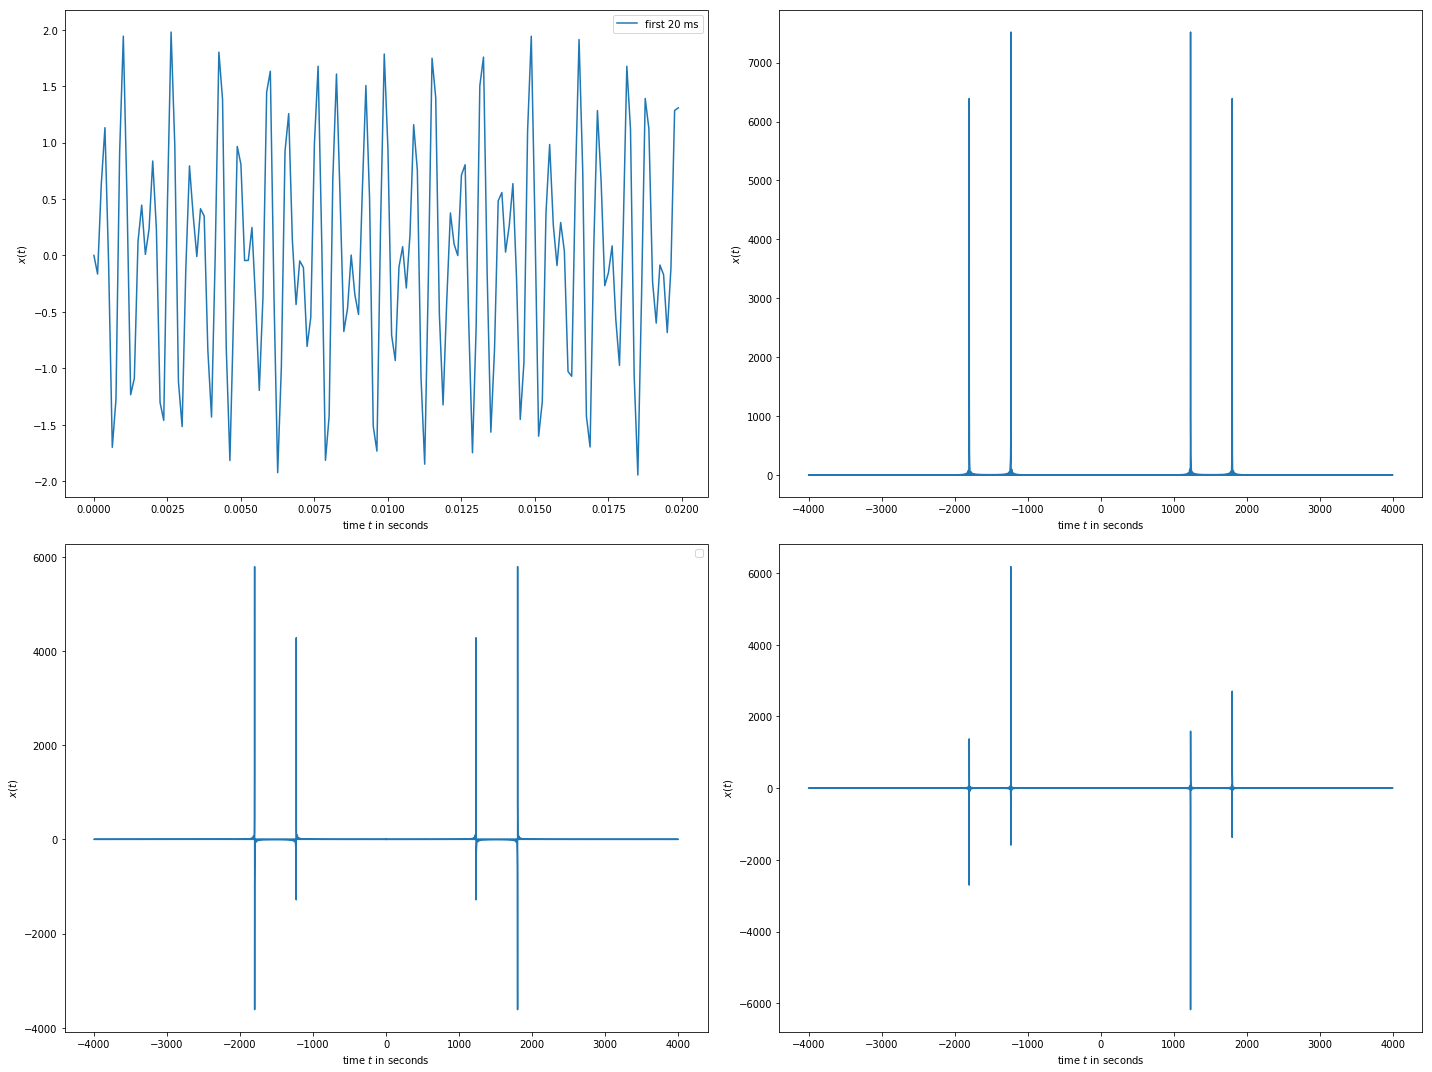

In [151]:
# your code here
#
# calculate the spectum (frequency domain representation)

fs=8000

f1 = 1230 # frequency in Hz for scipy samtooth
f2 = 1800
signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = np.sin(2*np.pi*f2*t+np.pi)
signal=signal1+signal2

DFT_length = 2**14 # take a power of two which is larger than the signal length
print('Signal length is ' + str(len(signal)))
print('DFT length is ' + str(DFT_length))
f1_dft = np.linspace(0,fs/2,int(DFT_length/2))
f2_dft = np.linspace(-fs/2,0,int(DFT_length/2))
f = np.concatenate([f1_dft,f2_dft])


spectrum = np.fft.fft(signal,int(DFT_length))
# spectrum2 = np.abs(np.fft.fft(signal2,n=FFT_length))

plt.figure(figsize=(20,15))

# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(2,2,1)
plt.plot(t[0:160], signal[0:160], label='first 20 ms');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();
                   
# plot the spectrum
plt.subplot(2,2,2)
plt.plot(f,np.abs(spectrum))
plt.xlabel('time $t$ in seconds');plt.ylabel('$x(t)$')


plt.subplot(2,2,3)
plt.plot(f,np.real(spectrum));
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# plot the spectrum
plt.subplot(2,2,4)
plt.plot(f,np.imag(spectrum))
plt.xlabel('time $t$ in seconds');plt.ylabel('$x(t)$')
plt.tight_layout() # this allowes for some space for the title text.

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 